# TD 12 : visualisation des données

In [5]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Plan

- [Matploblib, pandas](#mat)
    - [Récupération des données](#recup)
    - [Exercice 1 : écart entre les mariés](#exo1)
    - [Exercice 2 : graphe de la distribution avec pandas](#exo2)
    - [matploblib](#mat)
    - [Exercice 3 : distribution des mariages par jour](#exo3)
- [Autres alternatives](#alt)
    - [ggplot](#ggplot)
    - [Exercice 4 : même graphique avec ggplot](#exo4)
- [Réseaux, graphes](#graph)    
    - [networkx](#net)
    - [Graphviz](#graph)
    - [Exercice 5 : dessin d'un graphe avec networkx](#exo5)
- [Cartographie](#carte)
- [Graphiques interactifs](#inter)

Sauf à réutiliser un code déjà écrit, il est relativement difficile de faire un graphique sans connexion internet car on a fréquemment besoin de l'aide ou d'exemples déjà écrits par d'autres. Il n'est pas rare d'utiliser une dizaine de requête internet avant d'arriver à ses fins.
    

<h2 id="mat">Matplotlib, pandas</h2>

<h3 id="recup">Récupération des données</h3>

On récupère les données disponibles sur le site de l'INSEE : [Naissance, décès, mariages 2012](http://www.insee.fr/fr/themes/detail.asp?ref_id=fd-etatcivil2012&page=fichiers_detail/etatcivil2012/doc/documentation.htm). Il s'agit de récupérer la liste des mariages de l'année 2012. On souhaite représenter le graphe du nombre de mariages en fonction de l'écart entre les mariés.

In [1]:
import pyensae
files = ["etatcivil2012_nais2012_dbase.zip",
         "etatcivil2012_dec2012_dbase.zip",
         "etatcivil2012_mar2012_dbase.zip" ]
pyensae.download_data(files[-1], 
              website = 'http://telechargement.insee.fr/fichiersdetail/etatcivil2012/dbase/')
df = pyensae.dBase2df("mar2012.dbf")
print(df.shape, df.columns)
df.head()

    downloading of  http://telechargement.insee.fr/fichiersdetail/etatcivil2012/dbase/etatcivil2012_mar2012_dbase.zip  to  etatcivil2012_mar2012_dbase.zip
    unzipped 

 mar2012.dbf  to  .\mar2012.dbf
    unzipped  varlist_mariages.dbf  to  .\varlist_mariages.dbf
    unzipped  varmod_mariages.dbf  to  .\varmod_mariages.dbf
    unzipped  lisezmoi_MAR2012.txt  to  .\lisezmoi_MAR2012.txt
(246123, 16)

 Index(['AMAR', 'ANAISF', 'ANAISH', 'DEPDOM', 'DEPMAR', 'DEPNAISF', 'DEPNAISH', 'ETAMATF', 'ETAMATH', 'INDNATF', 'INDNATH', 'JSEMAINE', 'MMAR', 'NBENFCOM', 'TUCOM', 'TUDOM'], dtype='object')


,AMAR,ANAISF,ANAISH,DEPDOM,DEPMAR,DEPNAISF,DEPNAISH,ETAMATF,ETAMATH,INDNATF,INDNATH,JSEMAINE,MMAR,NBENFCOM,TUCOM,TUDOM
0,2012,1984,1982,99,29,99,75,1,1,2,1,1,01,N,,9
1,2012,1969,1956,99,75,99,69,4,4,2,2,3,01,N,,9
2,2012,1992,1982,99,34,99,99,1,1,1,2,5,01,N,,9
3,2012,1987,1985,99,13,84,99,1,1,1,2,4,01,N,,9
4,2012,1963,1968,99,26,99,99,1,1,2,2,6,01,N,,9


On récupère de la même manière la signification des variables :

In [2]:
import pyensae
vardf = pyensae.dBase2df("varlist_mariages.dbf")
print(vardf.shape, vardf.columns)
vardf

(16, 4) Index(['LIBELLE', 'LONGUEUR', 'TYPE', 'VARIABLE'], dtype='object')


,LIBELLE,LONGUEUR,TYPE,VARIABLE
0,Année du mariage,4,CHAR,AMAR
1,Année de naissance de l'épouse,4,CHAR,ANAISF
2,Année de naissance de l'époux,4,CHAR,ANAISH
3,Département de domicile après le mariage,3,CHAR,DEPDOM
4,Département de mariage,3,CHAR,DEPMAR
5,Département de naissance de l'épouse,3,CHAR,DEPNAISF
6,Département de naissance de l'époux,3,CHAR,DEPNAISH
7,État matrimonial antérieur de l'épouse,1,CHAR,ETAMATF
8,État matrimonial antérieur de l'époux,1,CHAR,ETAMATH
9,Indicateur de nationalité de l'épouse,1,CHAR,INDNATF


<h3 id="exo1">Exercice 1 : écart entre les mariés</h3>

1. En ajoutant une colonne et en utilisant l'opération [group by](http://pandas.pydata.org/pandas-docs/stable/groupby.html), on veut obtenir la distribution du nombre de mariages en fonction de l'écart entre les mariés. Au besoin, on changera le type d'une colone ou deux.
2. On veut tracer un nuage de points avec en abscisse l'âge du mari, en ordonnée, l'âge de la femme. Il faudra peut-être jeter un coup d'oeil sur la documentation de la méthode [plot](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html).

In [ ]:
df["colonne"] = df.apply (lambda r:  int(r["colonne"]), axis=1)  # pour changer de type
df["difference"] = ...

<h3 id="exo2">Exercice 2 : graphe de la distribution avec pandas</h3>

Le module ``pandas`` propose un panel de graphiques standard faciles à obtenir. On souhaite représenter la distribution sous forme d'histogramme. A vous de choisir le meilleure graphique depuis la page [Visualization](http://pandas.pydata.org/pandas-docs/stable/visualization.html).

In [ ]:
df.plot (...)

<h3 id="mat">matplotlib</h3>

[matplotlib](http://matplotlib.org/) est le module qu'utilise [pandas](http://pandas.pydata.org/). Ainsi, la méthode [plot](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) retourne un objet de type [Axes](http://matplotlib.org/api/axes_api.html#module-matplotlib.axes) qu'on peut modifier par la suite via les [méthodes suivantes](http://matplotlib.org/api/pyplot_summary.html). On peut ajouter un titre avec [set_title](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.set_title) ou ajouter une grille avec [grid](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.grid). On peut également superposer [deux courbes sur le même graphique](http://stackoverflow.com/questions/19941685/how-to-show-a-bar-and-line-graph-on-the-same-plot), ou [changer de taille de caractères](http://stackoverflow.com/questions/12444716/how-do-i-set-figure-title-and-axes-labels-font-size-in-matplotlib). Le code suivant trace le nombre de mariages par département.

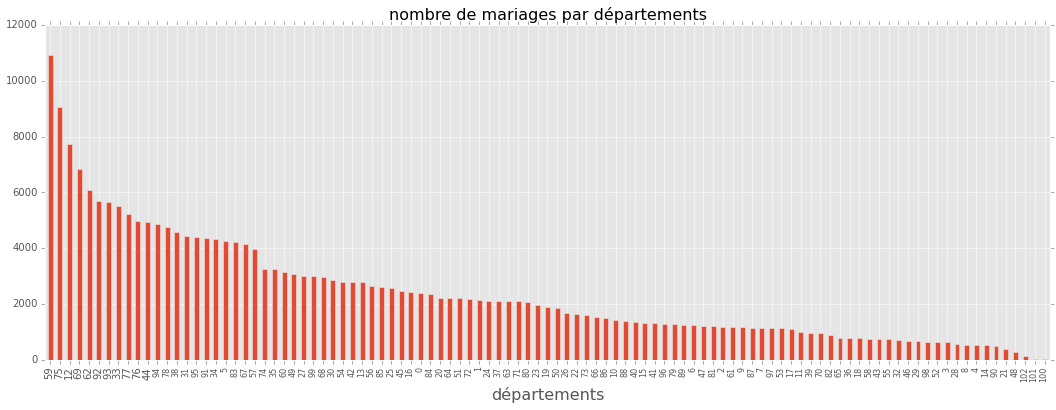

In [6]:
df["nb"] = 1
dep = df[["DEPMAR","nb"]].groupby("DEPMAR", as_index=False).sum().sort("nb",ascending=False)
ax = dep.plot(kind = "bar", figsize=(18,6))
ax.set_xlabel("départements", fontsize=16)
ax.set_title("nombre de mariages par départements", fontsize=16)
ax.legend().set_visible(False)  # on supprime la légende

# on change la taille de police de certains labels
for i,tick in enumerate(ax.xaxis.get_major_ticks()):
    if i > 10 :
        tick.label.set_fontsize(8) 

Quand on ne sait pas, le plus simple est d'utiliser un moteur de recherche avec un requête du type : ``matplotlib + requête``. Pour créer un graphique, le plus courant est de choisir le graphique le plus ressemblant d'une [gallerie de graphes](http://matplotlib.org/gallery.html) puis de l'adapter à vos données.

<h3 id="exo3">Exercice 3 : distribution des mariages par jour</h3>
    
On veut obtenir un graphe qui contient l'histogramme de la distribution du nombre de mariages par jour de la semaine et d'ajouter une seconde courbe correspond avec un second axe à la répartition cumulée.

<h2 id="alt">Autres alternatives</h2>

<h3 id="ggplot">ggplot</h3>

Le module [ggplot](https://github.com/yhat/ggplot) est inspiré du module [ggplot2](http://ggplot2.org/) pour [R](http://www.r-project.org/). Il reprend la même charte graphique et une syntaxe similaire. Les graphiques produits sont plus lisibles et plus faciles à construire.

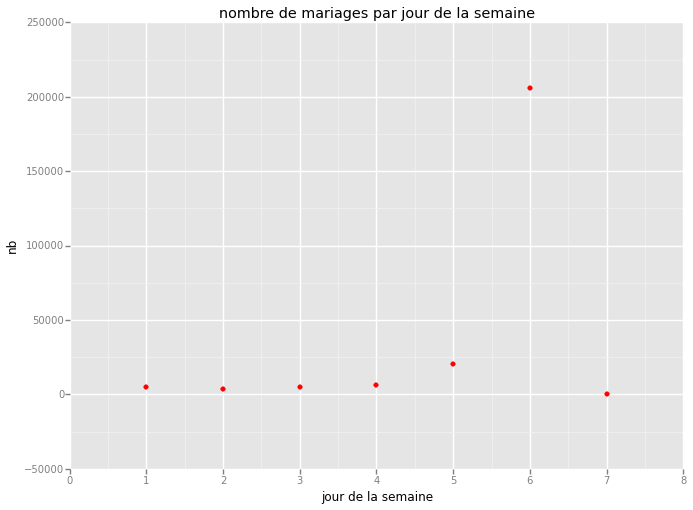

<ggplot: (12013495)>

In [7]:
from ggplot import *
df["nb"] = 1
dep = df[["JSEMAINE","nb"]].groupby("JSEMAINE", as_index=False).sum().sort("JSEMAINE",ascending=False)
ggplot(aes(x='JSEMAINE', y='nb'), data=dep) + \
    geom_point(color='red') + \
    ggtitle("nombre de mariages par jour de la semaine") + \
    xlab("jour de la semaine")

<h3 id="exo4">Exercice 4 : même graphique avec ggplot</h3>
    
On veut obtenir un graphique similaire qui contient l'histogramme de la distribution du nombre de mariages par jour de la semaine et la répartition cumulée sur deux graphiques séparées mais avec [ggplot](https://github.com/yhat/ggplot). Vous trouverez quelques exemples sur la page [ggplot for python](http://blog.yhathq.com/posts/ggplot-for-python.html) et [exemples avec la version 0.4](http://blog.yhathq.com/posts/ggplot-0.4-released.html). Ce module est moins complet que la version de [R.ggplot2](http://ggplot2.org/) mais il utilise presque la même syntaxe : [documentation ggplot2](http://docs.ggplot2.org/current/). Vous aurez besoin de la fonction [facet_wrap](http://docs.ggplot2.org/current/facet_wrap.html) et peut-être aussi besoin de regarder l'exemple [How do I create a bar chart in python ggplot?](http://stackoverflow.com/questions/22599521/how-do-i-create-a-bar-chart-in-python-ggplot).

Cet exercice est plus une façon de découvrir un nouveau module. La solution la plus simple consiste néanmoins à changer le style de [matplotlib pour celui de ggplot](http://matplotlib.org/users/style_sheets.html).

<h2 id="graph">Réseaux, graphes</h2>

<h3 id="net">networkx</h3>

Le module [networkx](https://networkx.github.io/) permet de représenter un réseau ou un graphe de petite taille (< 500 noeuds). Un graphe est défini par un ensemble de noeuds (ou *vertex* en anglais) reliés par des arcs (ou *edge* en anglais). La [gallerie](http://networkx.github.io/documentation/latest/gallery.html) vous donnera une idée de ce que le module est capable de faire.

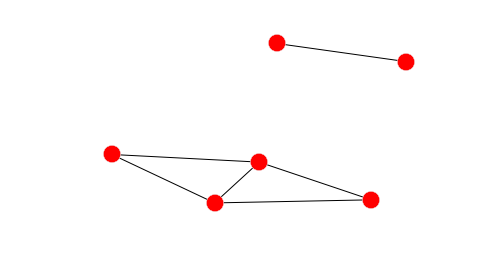

In [8]:
import random
import networkx as nx
G=nx.Graph()
for i in range(15) :
    G.add_edge ( random.randint(0,5),  random.randint(0,5) )

import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,4))
nx.draw(G, ax = ax)

<h3 id="graph">Graphviz</h3>

[Graphviz](http://www.graphviz.org/) est un outil développé depuis plusieurs années déjà qui permet de réprésenter des graphes plus conséquents (> 500 noeuds). Il propose un choix plus riche de graphes : [gallerie](http://www.graphviz.org/Gallery.php). Il est utilisable via le module [graphviz](https://pypi.python.org/pypi/graphviz). Son installation requiert l'installation de l'outil [Graphviz](http://www.graphviz.org/) qui n'est pas inclus. La différence entre les deux modules tient dans l'algorithme utilisé pour assigner des coordonnées à chaque noeud du graphe de façon à ce que ses arcs se croisent le moins possibles. Au delà d'une certaine taille, le dessin de graphe n'est plus lisible et nécessite quelques tatônnements. Cela peut passer par une clusterisation du graphe (voir la [méthode Louvain](http://perso.uclouvain.be/vincent.blondel/research/louvain.html)) de façon à colorer certains noeuds proches voire à les regrouper.

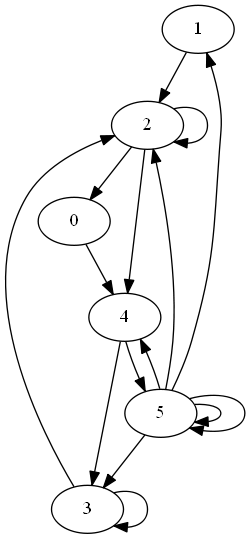

In [9]:
import random, os
from graphviz import Digraph
from IPython.display import Image
from pyquickhelper.helpgen.default_conf import get_graphviz_dot
bin = os.path.dirname(get_graphviz_dot())
if bin not in os.environ["PATH"]:
    os.environ["PATH"] = os.environ["PATH"] + ";" + bin

dot = Digraph(comment='random graph', format="png")
for i in range(15) :
    dot.edge ( str(random.randint(0,5)),  str(random.randint(0,5)) )

img = dot.render('t_random_graph.gv')
Image(img)

<h3 id="exo5">Exercice 5 : dessin d'un graphe avec networkx</h3>
    
On construit un graphe aléatoire, ses 20 arcs sont obtenus en tirant 20 fois deux nombres entiers entre 1 et 10. Chaque arc doit avoir une épaisseur aléatoire. On regardera les fonctions [spring_layout](https://networkx.github.io/documentation/latest/reference/generated/networkx.drawing.layout.spring_layout.html?highlight=spring_layout#networkx.drawing.layout.spring_layout), [draw_networkx_nodes](https://networkx.github.io/documentation/latest/reference/generated/networkx.drawing.nx_pylab.draw_networkx_nodes.html?highlight=draw_networkx_nodes#networkx.drawing.nx_pylab.draw_networkx_nodes), [draw_networkx_edges](https://networkx.github.io/documentation/latest/reference/generated/networkx.drawing.nx_pylab.draw_networkx_edges.html?highlight=draw_networkx_edges#networkx.drawing.nx_pylab.draw_networkx_edges). La [gallerie](https://networkx.github.io/documentation/latest/gallery.html) peut aider aussi.

<h2 id="carte">Cartographie</h2>

Dessiner une carte n'est pas difficile en soit. Toute la difficulté vient du fait qu'on a besoin pour lire cette carte de point de référence : les rues pour une ville, les frontières pour un département, une région, un pays, les fleuves et montagnes pour une carte représentation des données démographiques. Ces informations sont importantes pour situer l'information représentée par le graphique. Si vous n'avez pas besoin de tout ça, les formules suivantes vous suffiront :

- [Coordonnées sphériques](http://fr.wikipedia.org/wiki/Coordonn%C3%A9es_sph%C3%A9riques)
- [Conversion latitude/longitude to X/Y](http://www.movable-type.co.uk/scripts/latlong.html)
- [distance de Haversine](http://en.wikipedia.org/wiki/Haversine_formula)

Ces fonctionnalités sont disponibles via le module [geopy](https://github.com/geopy/geopy). Dans le cas contraire, voici quelques directions :

- [basemap](http://matplotlib.org/basemap/index.html) : les exemples de la documentation sont assez longs, le module permet de superposer sur la même carte de nombreuses informations, les frontières, la direction des vents ou des courants. Le téléchargement du module prend un peu de temps (100 Mo) à cause de toutes ces données.
- [shapely](https://github.com/Toblerity/Shapely) : ce module est utile pour dessiner des aires sur des cartes. Sous Windows, il faut l'installer depuis [Unofficial Windows Binaries for Python Extension Packages](http://www.lfd.uci.edu/~gohlke/pythonlibs/) car il inclut la DLL ``geos_c.dll`` qui vient de [GEOS](http://trac.osgeo.org/osgeo4w/). Dans le cas contraire, il faut installer [GEOS](http://trac.osgeo.org/osgeo4w/), ce qui prend pas mal de temps. Il est utilisé par  [cartopy](http://scitools.org.uk/cartopy/).

Il en existe d'autres mais leur installation recèle quelques difficultés que je n'ai pas eu la patience de contourner :

- [cartopy](http://scitools.org.uk/cartopy/) : les exemples sont plus courts, mais il télécharge les données au moment où il en a besoin
- [mapnik](http://mapnik.org/) : l'installation sur Windows est réservée aux connaisseurs


L'exemple qui suit utilise [basemap](http://matplotlib.org/basemap/index.html). Il est tiré de la page [BaseMap](http://nbviewer.ipython.org/github/rdhyee/working-open-data/blob/master/notebooks/Day_14_basemap_redux.ipynb).

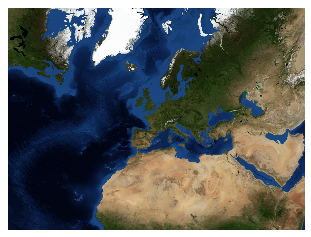

In [10]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution='c',lat_1=44,lat_2=52,lat_0=48,lon_0=2.34)
m.bluemarble()

Le suivant montre l'Europe et ses pays avec une projection différente ([Setting up the map](http://matplotlib.org/basemap/users/mapsetup.html)). Quelques recherches sur Internet permettent d'aboutir rapidement à des tutoriels comme celui-ci : [Visualization: Mapping Global Earthquake Activity](http://introtopython.org/visualization_earthquakes.html).

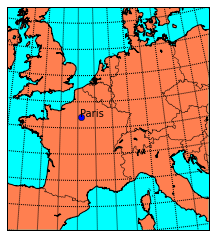

In [11]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
m = Basemap(llcrnrlon=-5,llcrnrlat=40,urcrnrlon=20,urcrnrlat=56,
            resolution='i',projection='cass',lon_0=2.34,lat_0=48)
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawparallels(np.arange(-40,61.,2.))
m.drawmeridians(np.arange(-20.,21.,2.))
m.drawmapboundary(fill_color='aqua')

# on ajoute Paris sur la carte
lon = 2.3488000
lat = 48.853410
x,y = m(lon, lat)
m.plot(x, y, 'bo', markersize=6)
plt.text(x, y, "Paris")

La vidéo [Spatial data and web mapping with Python](http://www.youtube.com/watch?v=qmgh14LUOjQ&feature=youtu.be) vous en dira un peu plus sur la cartographie. Lorsqu'on dessine une carte avec les rues d'une ville, on veut pouvoir zoomer et dézoomer facilement pour avoir une vue d'ensemble ou une vue détaillé. Dans ce cas là, il faut utiliser un service externe telle que [Gmap API](https://developers.google.com/maps/?hl=FR), [Bing Map API](http://www.microsoft.com/maps/choose-your-bing-maps-API.aspx), [Yahoo Map API](https://developer.yahoo.com/maps/simple/V1/) ou [OpenStreetMap](https://openstreetmap.fr/) qui est une version open source. Dans tous les cas, il faut faire attention si les données que vous manipulez dans la mesure où elles transitent par un service externe. L'article [Busy areas in Paris](http://www.xavierdupre.fr/blog/2013-09-26_nojs.html) est un exemple d'utilisation d'[OpenStreetMap](https://openstreetmap.fr/). Ce qu'on cherche avant tout, c'est un [graphique interactif](#inter). Il existe des modules qui permettent d'utiliser ces services directement depuis un notebook python. [smopy](https://github.com/rossant/smopy) crée une carte non interactive :

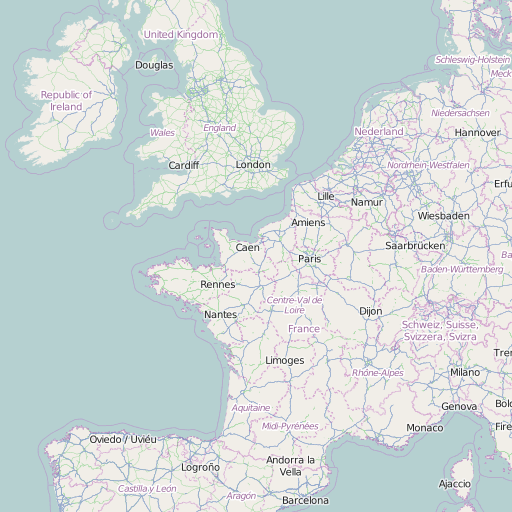

In [12]:
import smopy
map = smopy.Map((42., -1., 55., 3.), z=5)
map.show_ipython()

Le module [folium](https://github.com/wrobstory/folium) insert du javascript dans le notebook lui-même (pour que le code suivant marche, vous devez utiliser cette version de folium [sdpython/folium](https://github.com/sdpython/folium)).

In [13]:
import folium
map_osm = folium.Map(location=[48.85, 2.34])
map_osm.create_map(path='osm.html') # pour sauver la carte au format HTML
map_osm.display_notebook()

<h2 id="inter">Graphiques interactifs</h2>

Ce sujet sort du cadre de cette séance. Un graphique interactif réagit à des événéments comme le passage du curseur de la souris, un clic, un zoom. Il est difficile de lire un graphique trop chargé, c'est pourquoi en rendant le graphique interactifs, on cherche à donner plus d'information sans nuire à sa lisibilité. Voici quelques scénarios :

- On veut représenter une des dimensions du problème en animant le graphique. C'est fréquent en 3D où un des axes est celui du temps. On préfèrera un graphique en 2D évoluant dans le temps.
- Lorsqu'il y a trop de courbes à dessiner, le lecteur peut activer ou désactiver certaines courbes pour pouvoir les comparer. 
- On peut permettre de changer d'échelle (logarithmique ou changer la base 100 à différents endroits).
- On veut donner une vue d'ensemble et en même temps un niveau de détails plus fin si le lecteur le demande.

Ces animations pris leur essor avec internet et le langage [javascript](http://fr.wikipedia.org/wiki/JavaScript). Concevoir un graphique animé nécessite plus de temps car il faut prévoir ce qu'il doit se passer en cas d'action du lecteur (souris, touche, ...). Les modules python permettant de les créer construisent en fait un code javascript qu'il faut ensuite exécuter dans un navigateur (ou directement dans un notebook comme celui-ci). La librairie javascript qui a changé la façon de les concevoir est [d3.js](http://d3js.org/). Beaucoup d'autres librairies sont des surcouches de celle-ci [nvd3](http://nvd3.org/). 

Le module [plotly](https://plot.ly/python/) est intéressant mais toutes les fonctionnalités ne sont pas gratuites. De plus, il faut créer un compte pour pouvoir s'en servir. Le module [mpld3](http://mpld3.github.io/) est intéressant dans le sens où il convertit un graphique créé avec un matplotlib en un graphique javascript réalisé avec [d3.js](http://d3js.org). Il faut d'abord activer la sortie notebook (voir [D3 Plugins: Truly Interactive Matplotlib In Your Browser](http://jakevdp.github.io/blog/2014/01/10/d3-plugins-truly-interactive/)).

In [14]:
import mpld3
mpld3.enable_notebook()

Ensuite, les graphiques réalisés avec matplotlib seront affichés en javascript (si cela ne fonctionne pas, il ne faut pas hésiter à redémarrer le Kernel). Il faut cliquer sur le graphique pour que celui-ci deviennent zoomable.

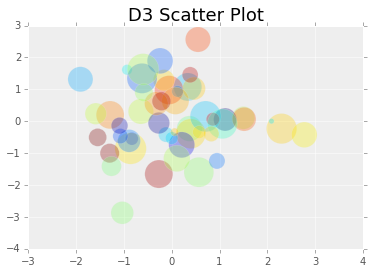

In [15]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(subplot_kw=dict(axisbg='#EEEEEE'))
ax.grid(color='white', linestyle='solid')

N = 50
scatter = ax.scatter(np.random.normal(size=N),
                     np.random.normal(size=N),
                     c=np.random.random(size=N),
                     s = 1000 * np.random.random(size=N),
                     alpha=0.3,
                     cmap=plt.cm.jet)

ax.set_title("D3 Scatter Plot", size=18)

Il n'existe pas encore un module incontournable. Un de ceux qui pourrait devenir une référence est le module [bokeh](http://bokeh.pydata.org/). Il n'utilise pas [d3.js](http://d3js.org/) mais le principe est le même.


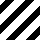
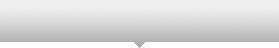
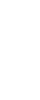
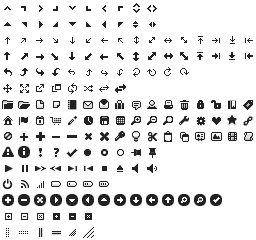
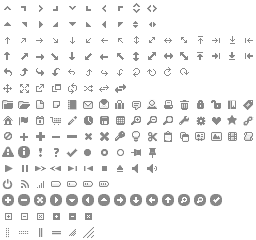
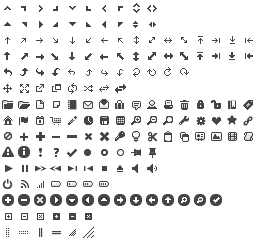
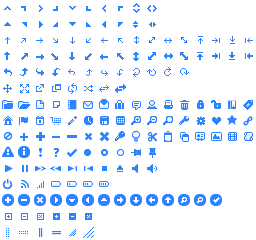
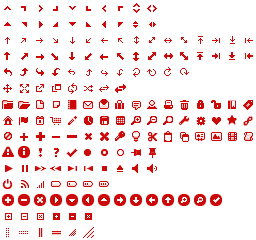
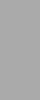
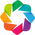
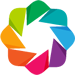
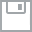
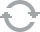
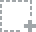
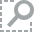
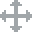
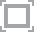
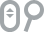

In [16]:
import bokeh, bokeh.plotting as bplt
bplt.output_notebook()

Une fois que le module est initialisé, on peut afficher son graphique.

In [30]:
p = bplt.figure(title = "Exemple")
p.xaxis.axis_label = 'X'
p.yaxis.axis_label = 'Y'

p.circle([1,2,3,4],[4,5,6,5.5], fill_color="red", color="red", size=12)
bplt.show(p)

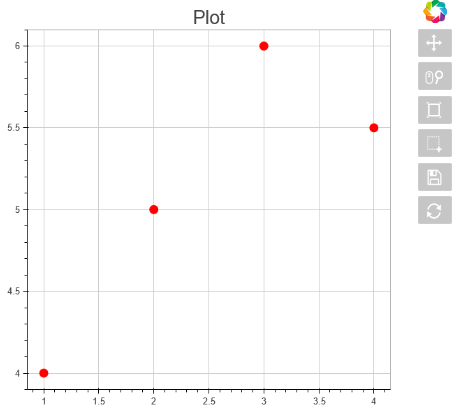

In [27]:
from pyquickhelper import NbImage  # seconde image
NbImage("pngbokeh.png")            # pour la conversion des notebooks au format HTML

Pour sauver le graph sous forme de fichier HTML :

In [32]:
import os
bplt.output_file("example_bokeh.html")
bplt.save(p)
print([ _ for _ in os.listdir(".") if "html" in _ ] )

Session output file 'example_bokeh.html' already exists, will be overwritten.
['example_bokeh.html', 'osm.html']